In [1]:
input_dim = 5
model_file = "Model/model.cpkt"
num_clusters = 2

import json
import matplotlib.pyplot as plt
from matplotlib.path import Path
import numpy as np
import os
import pickle
import tensorflow as tf

import sys
sys.path.insert(0, "../Code/")
from base import load_encoder
from explain_sync import explain, apply

def load_model(input_dim = input_dim, model_file = model_file):
    return load_encoder(input_dim, model_file)


In [2]:
###
# Load Data & Configuration
###

x, y = pickle.load(open("data.pkl", "rb"))

with open("vertices.json") as json_file:  
    all_vertices = json.load(json_file)


INFO:tensorflow:Restoring parameters from Model/model.cpkt


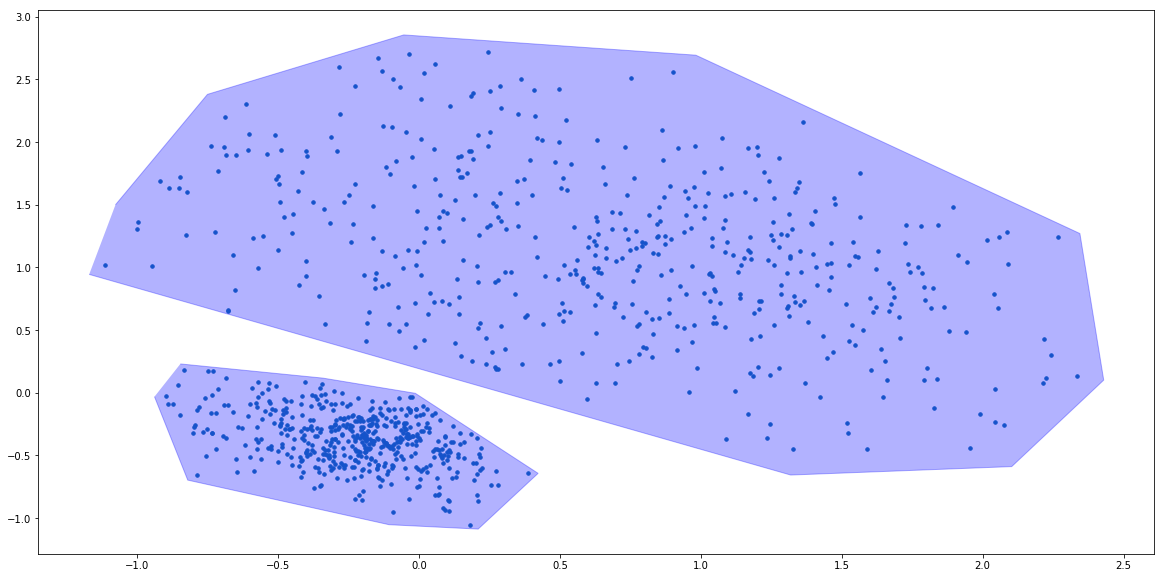

In [3]:
###
# Visualize the data and the marked clusters
###

sess, rep, X, D = load_model()

data_rep = sess.run(rep, feed_dict={X: x, D: np.zeros((1, input_dim))})

fig, ax = plt.subplots(figsize=(20, 10))
patches = []

for i in range(num_clusters):
    line = plt.Polygon(all_vertices[i], closed=False, color="blue", alpha=0.3)
    ax.add_line(line)

plt.scatter(data_rep[:, 0], data_rep[:, 1], s = 12)

plt.show()
plt.close()

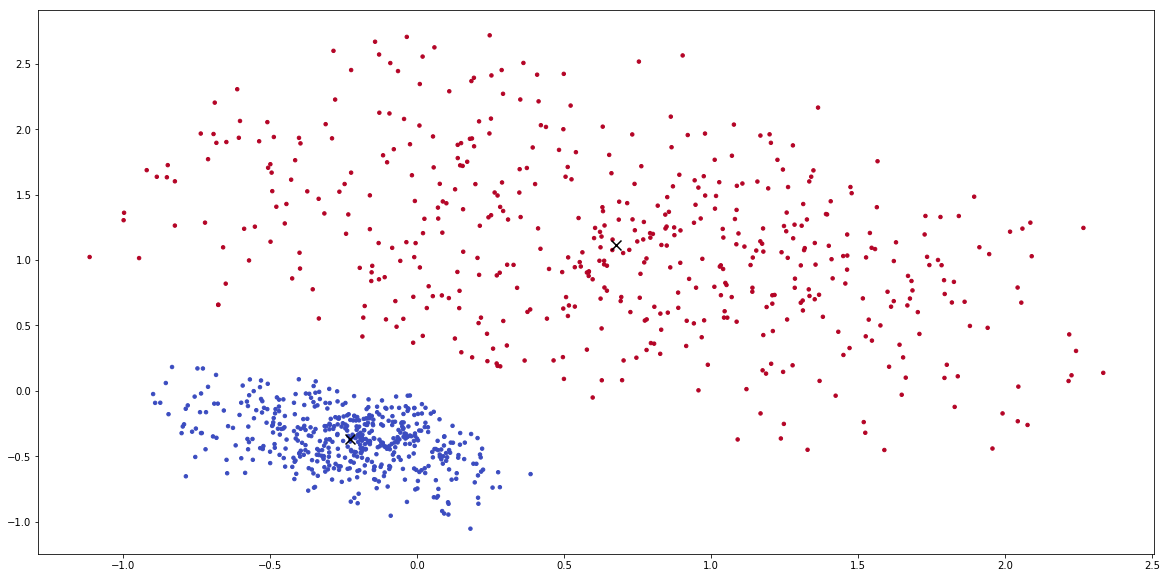

In [4]:
###
# Find the datapoints in each marked cluster
###

m = data_rep.shape[0]
cluster = -1.0 * np.ones((m))
indices = [[]] * num_clusters
centers = [[]] * num_clusters
for i in range(num_clusters):
    path = Path(all_vertices[i])
    indices[i] = []
    for j in range(m):
        if path.contains_points(data_rep[j].reshape((1,2))):
            cluster[j] = i
            indices[i].append(j)
    centers[i] = np.mean(data_rep[indices[i], :], axis = 0)
    
centers = np.array(centers)

fig, ax = plt.subplots(figsize=(20, 10))
patches = []
    
plt.scatter(data_rep[:, 0], data_rep[:, 1], s = 12, c = cluster, cmap = plt.cm.coolwarm)
plt.scatter(centers[:, 0], centers[:, 1], c = "black", marker = "x", s = 100)

plt.show()
plt.close()   

In [5]:
###
# Compute the cluster explanations
###

os.system("rm -rf explanation")
deltas = explain(load_model, x, data_rep, indices, lambda_global = 0.5, num_points = 10, learning_rate = 0.01)    


INFO:tensorflow:Restoring parameters from Model/model.cpkt
0 5.040318
1 4.999992179870606
6 4.9944656694383625
7 4.697842455308248
17 4.5136160901827544
18 4.422585825768971
20 4.172760181352268
21 3.958681570939514
22 3.9490204937329527
23 3.7390449303749773
25 3.5964158814424767
26 3.490804711694225
39 3.4681289539267377
40 3.378223140138068
66 3.2801166798353787
81 3.187502319927188
84 3.030724069719276
85 3.015503353993381
86 2.9732480530026124
87 2.918970818884602
89 2.899052244434376
90 2.8573209959354573
91 2.673202441759697
92 2.6543627082953973
137 2.5518183665974665
142 2.5000964180336767
339 2.4357175909958957
341 2.431417350334025
342 2.3606606284041076
343 2.2947087013058844
676 2.2811805912669385
686 2.2418234567824378
688 2.2234698831038213
691 2.175103307323503


ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
###
# Visualize the cluster explanations
###

def myplot(c1, c2):
    print("\nFrom ", c1, " to ", c2, "\n")
    
    if c1 == 0:
        d = deltas[c2 - 1]
    elif c2 == 0:
        d = -1.0 * deltas[c1 - 1]
    else:
        d = -1.0 * deltas[c1 - 1] + deltas[c2 - 1]
        
    apply(load_model, x, data_rep, indices, c1, np.reshape(d, (1, input_dim)), num_points = 10)
    
myplot(0, 1)
myplot(1, 0)
